# Color scales

In [1]:
%%capture
!curl -OL https://raw.githubusercontent.com/pwwang/plotnine-prism/refs/heads/master/examples/nb_helpers.py
import patchworklib as pw
from plotnine import *
from plotnine_prism import *
%run nb_helpers.py

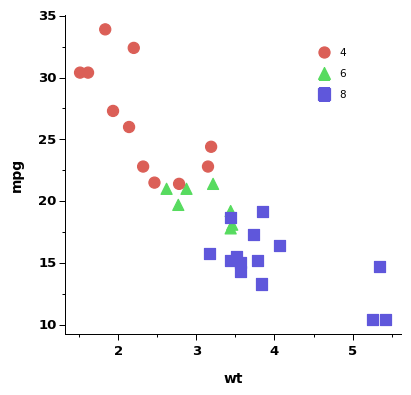

<Figure Size: (400 x 400)>

In [2]:

# create a base plot to compare colour scales
base = (ggplot(mtcars, aes(x = "wt", y = "mpg")) +
  geom_point(aes(colour = "cyl", shape = "cyl"), size = 4) + 
  theme_prism() + 
  theme(legend_position = (0.8, 0.8)))

base

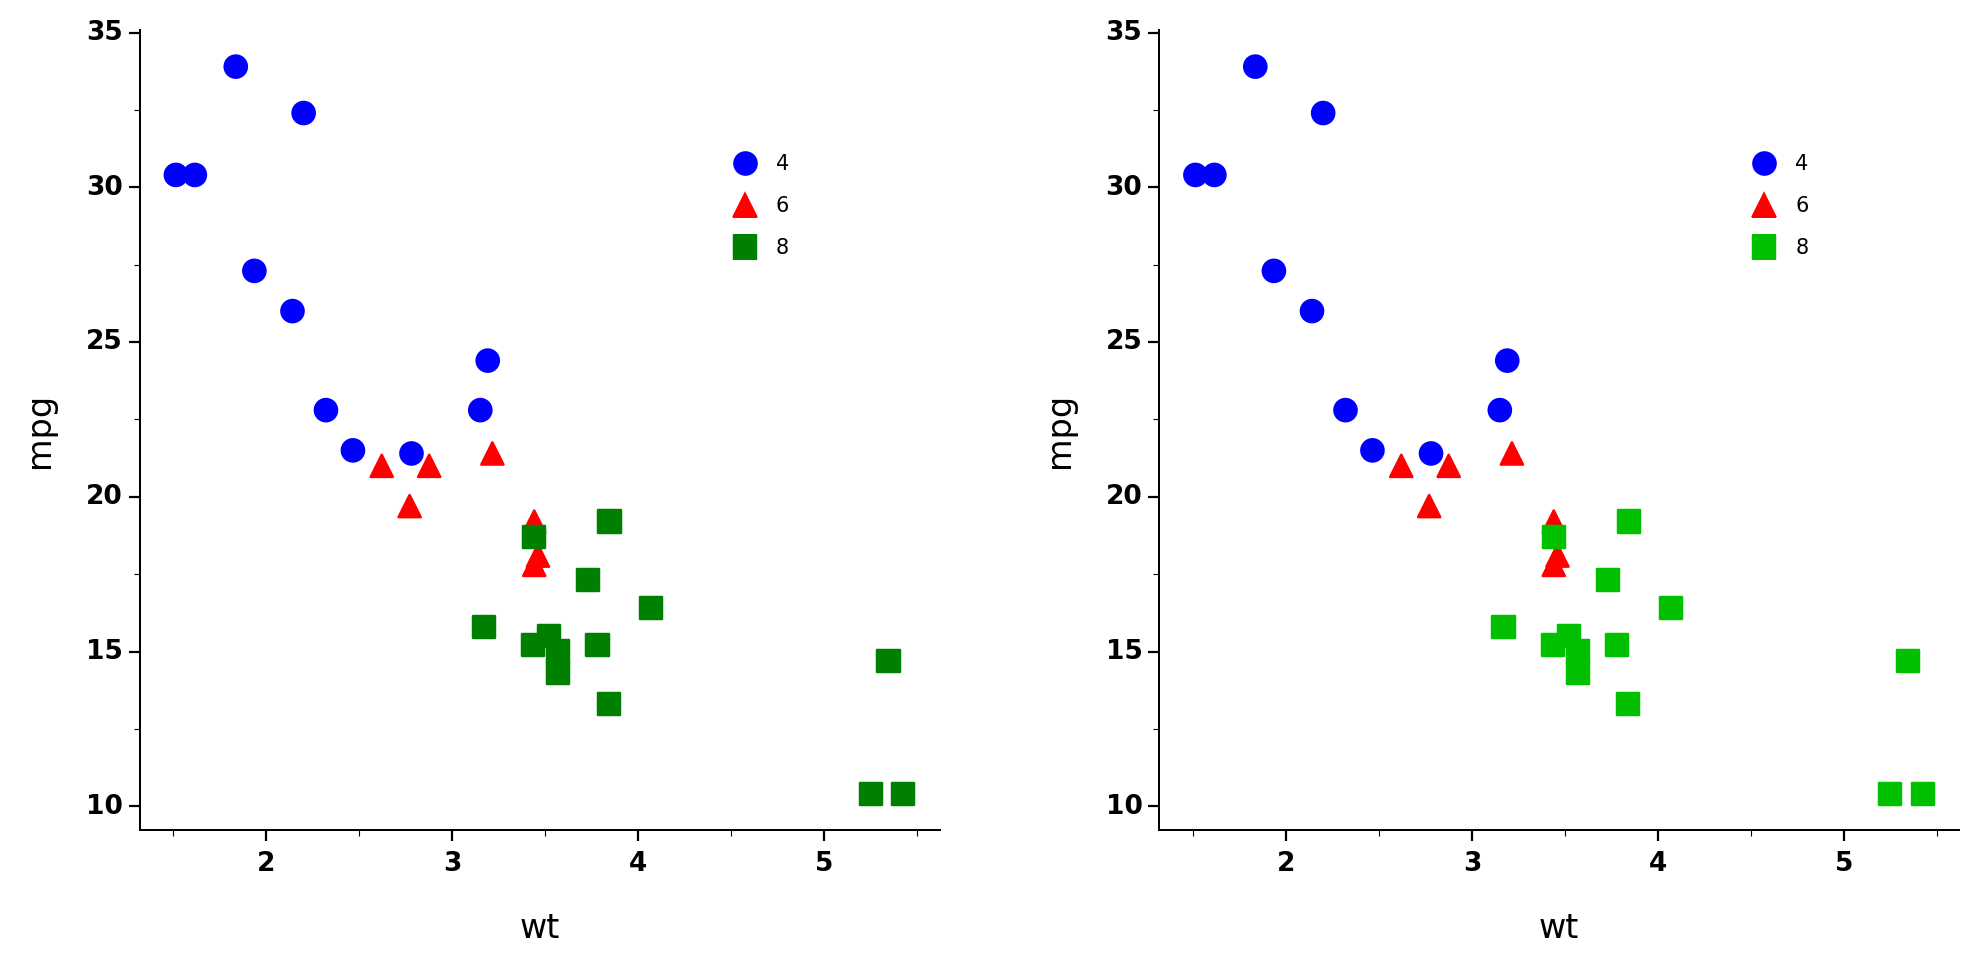

In [3]:
# compare manual colour scale with prism colour scale
p1 = base + scale_colour_manual(values = ("blue", "red", "green"))
p2 = base + scale_colour_prism()

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

In [4]:
print(str(list_color_pals()))

['autumn_leaves', 'beer_and_ales', 'black_and_white', 'blueprint', 'candy_bright', 'candy_soft', 'colorblind_safe', 'colors', 'diazo', 'earth_tones', 'evergreen', 'fir', 'flames', 'floral', 'greenwash', 'inferno', 'magma', 'mustard_field', 'muted_rainbow', 'neon', 'ocean', 'office', 'pastels', 'pearl', 'plasma', 'prism_dark', 'prism_light', 'purple_passion', 'quiet', 'shades_of_gray', 'spring', 'stained_glass', 'starry', 'summer', 'sunny_garden', 'the_blues', 'viridis', 'warm_and_sunny', 'warm_pastels', 'waves', 'winter_bright', 'winter_soft', 'wool_muffler']


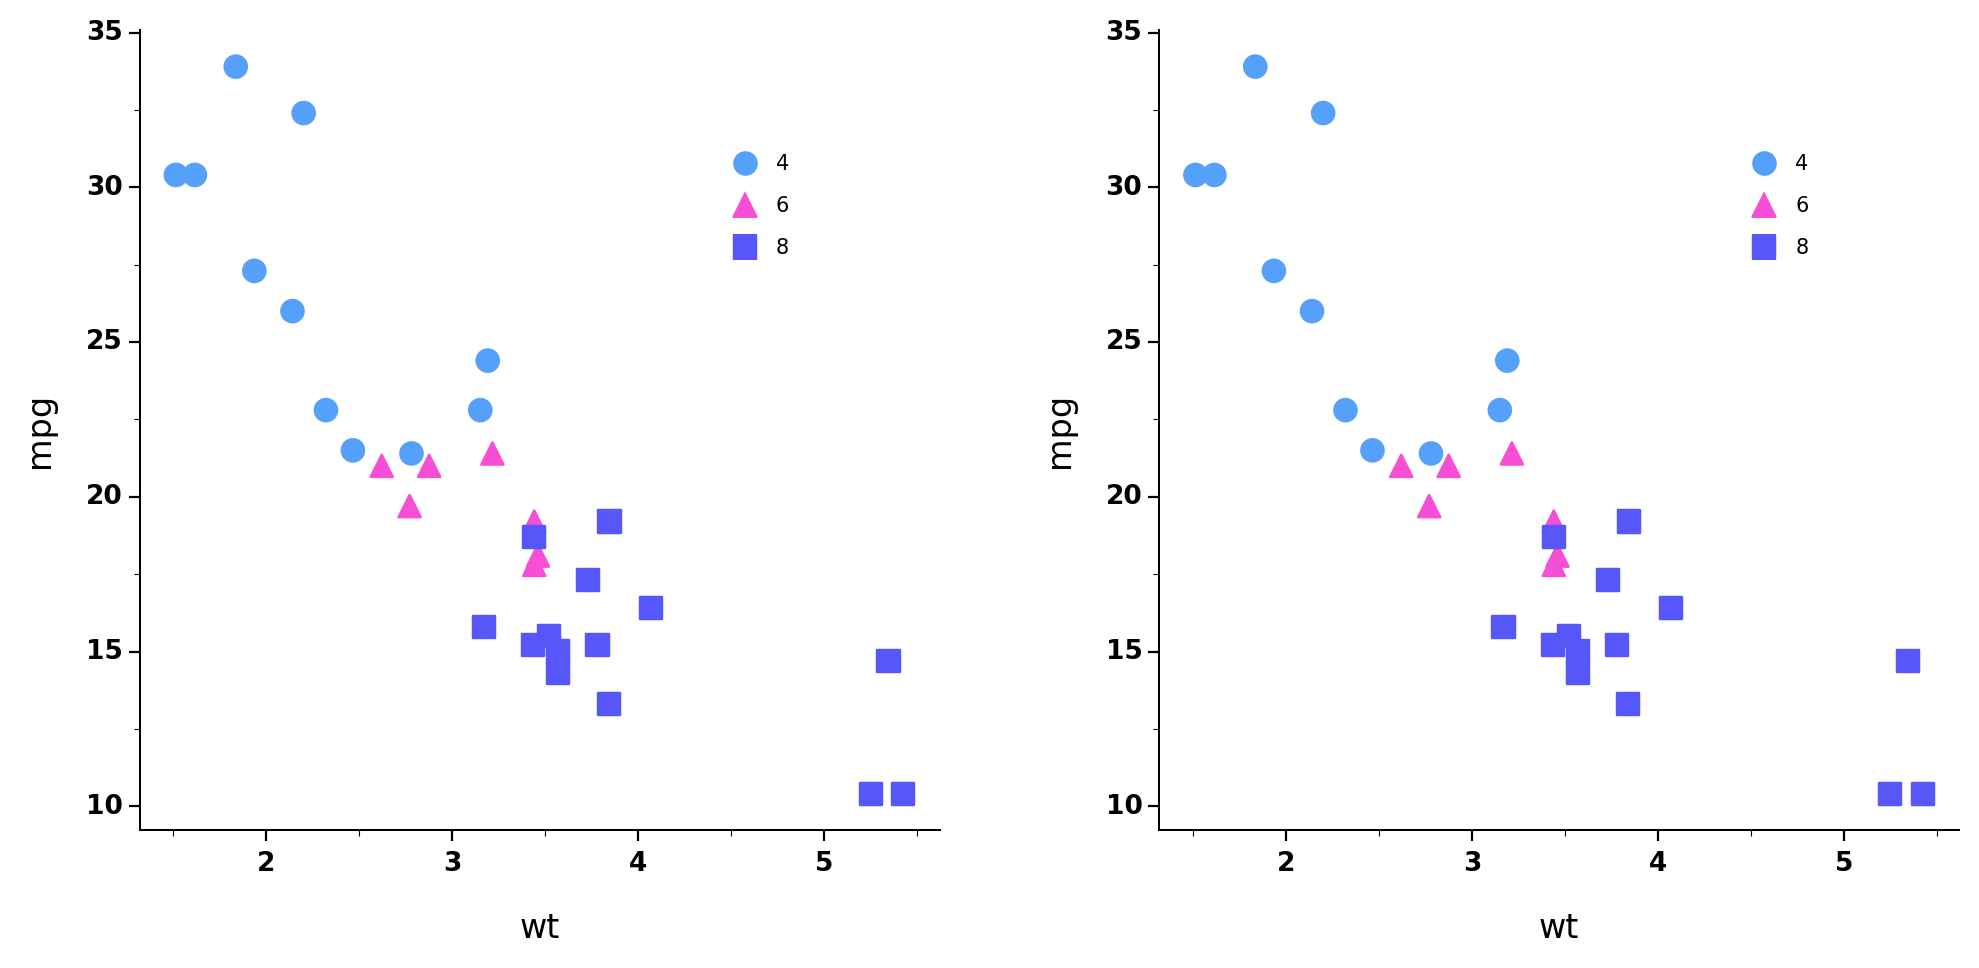

In [5]:
# try out some different colour palettes
p1 = base + scale_colour_prism(palette = "winter_soft")
p2 = base + scale_colour_prism(palette = "winter_soft")

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

# Fill scales

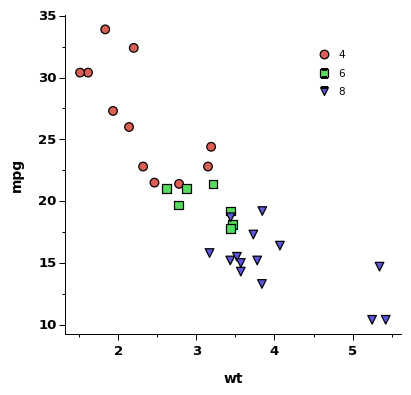

<Figure Size: (400 x 400)>

In [6]:
# create a base plot to compare fill scales
base = (
    ggplot(mtcars, aes(x="wt", y="mpg"))
    + geom_point(aes(fill="cyl", shape="cyl"), size=3)
    + theme_prism()
    + theme(legend_position=(0.8, 0.8))
    + scale_shape_prism(palette="filled")
)

base


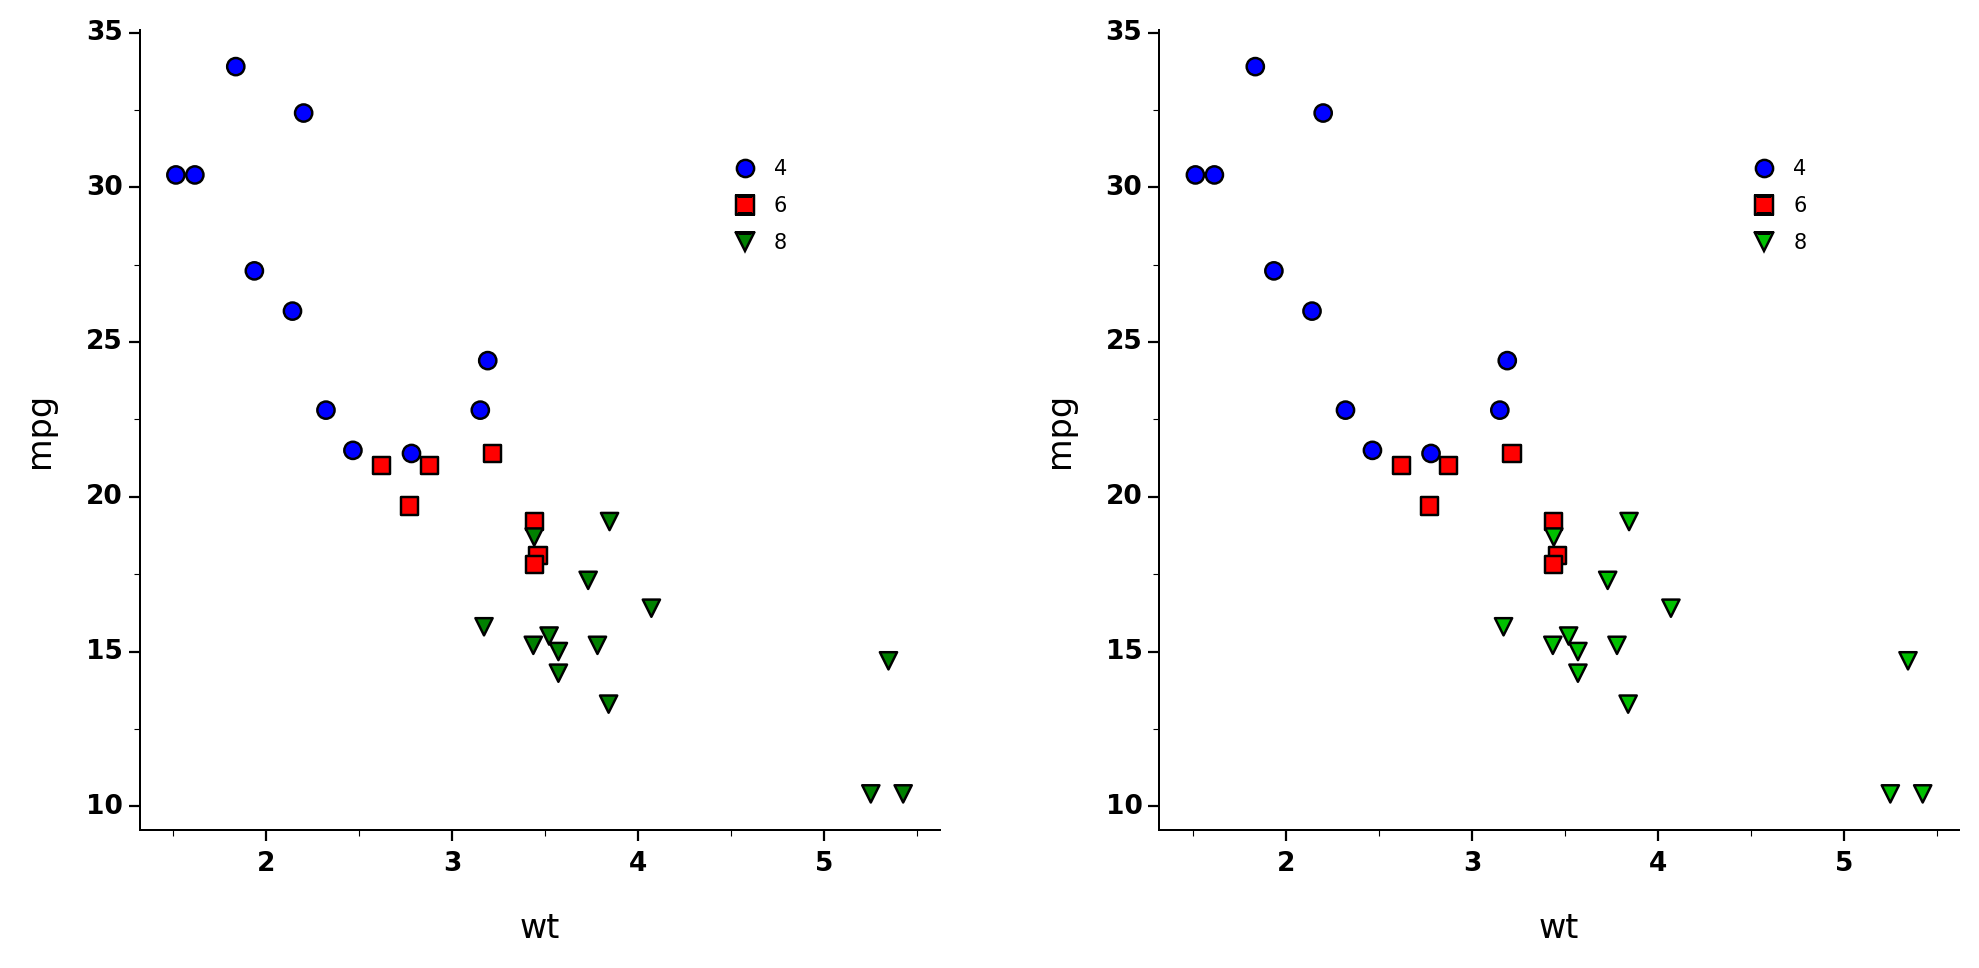

In [7]:
# compare manual fill scale with prism fill scale
p1 = base + scale_fill_manual(values = ("blue", "red", "green"))
p2 = base + scale_fill_prism()

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

In [8]:
print(str(list_fill_pals()))

['autumn_leaves', 'beer_and_ales', 'black_and_white', 'blueprint', 'candy_bright', 'candy_soft', 'colorblind_safe', 'colors', 'diazo', 'earth_tones', 'evergreen', 'fir', 'flames', 'floral', 'greenwash', 'inferno', 'magma', 'mustard_field', 'muted_rainbow', 'neon', 'ocean', 'office', 'pastels', 'pearl', 'plasma', 'prism_dark', 'prism_light', 'purple_passion', 'quiet', 'shades_of_gray', 'spring', 'stained_glass', 'starry', 'summer', 'sunny_garden', 'the_blues', 'viridis', 'warm_and_sunny', 'warm_pastels', 'waves', 'winter_bright', 'winter_soft', 'wool_muffler']


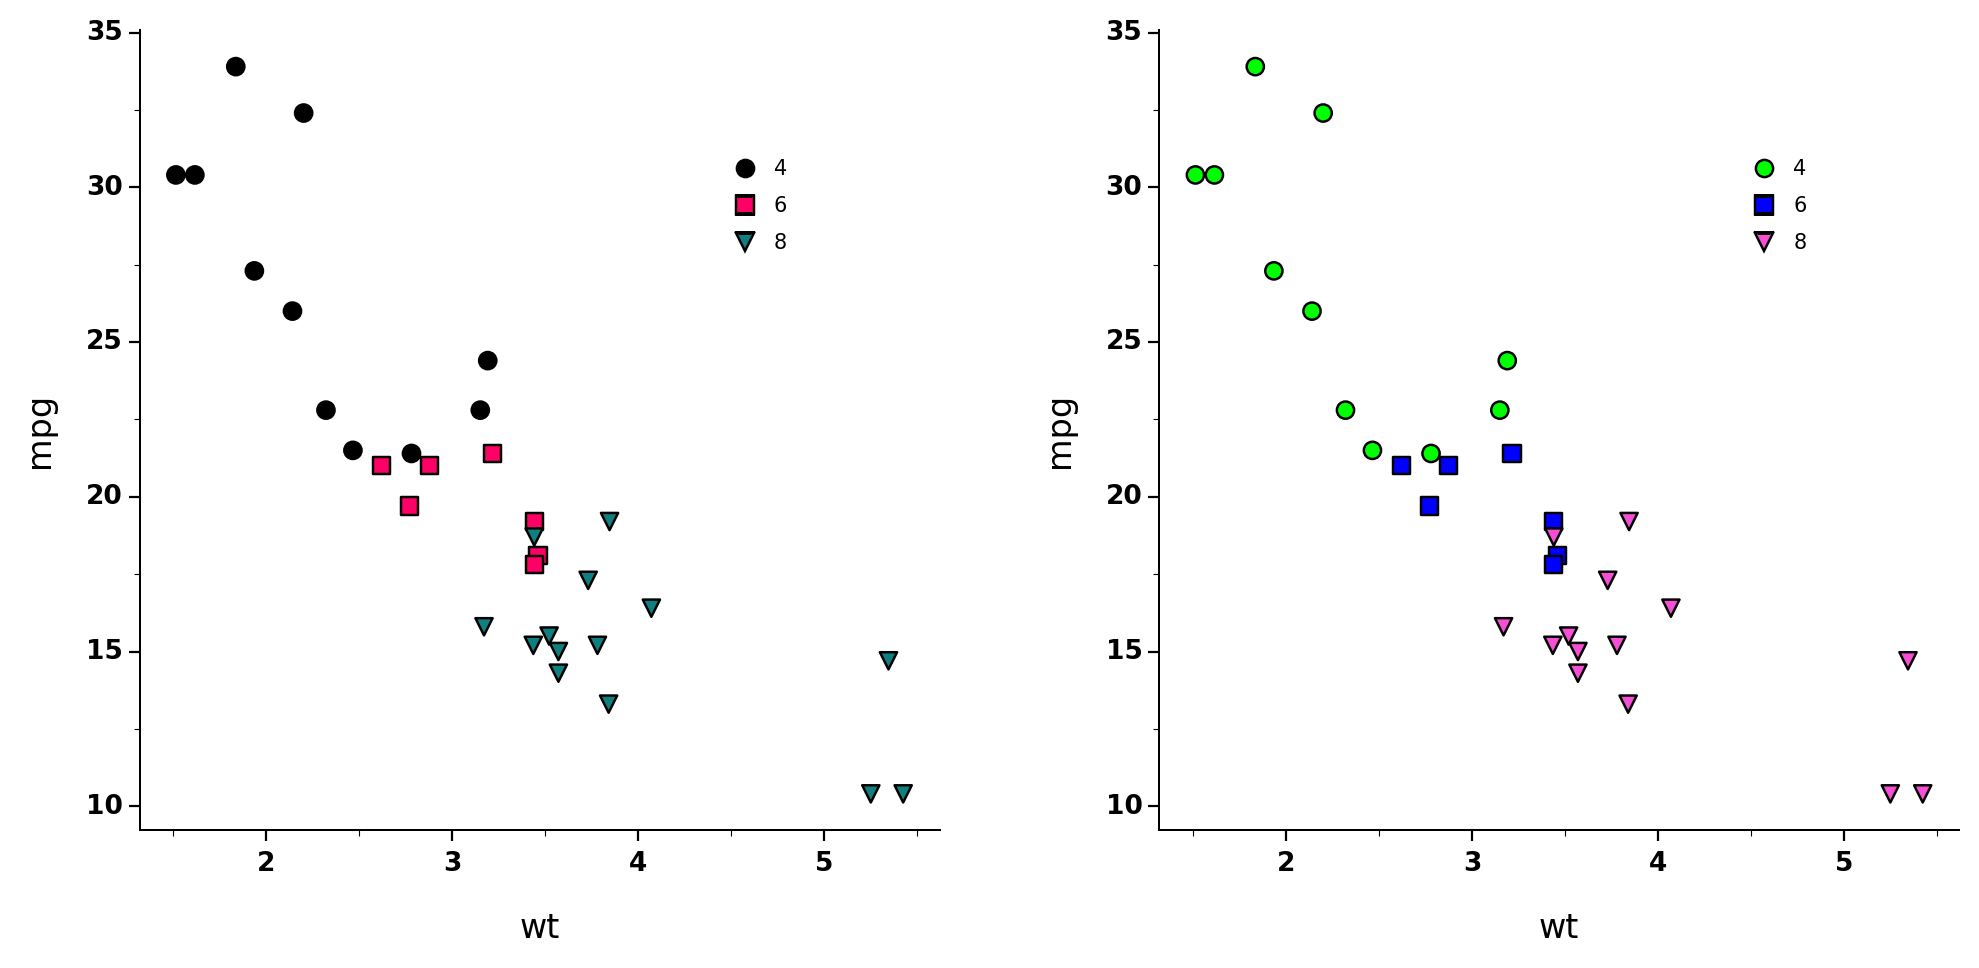

In [9]:
# try out some different fill palettes
p1 = base + scale_fill_prism(palette = "colorblind_safe")
p2 = base + scale_fill_prism(palette = "neon")

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

Get a sense of all the palettes:

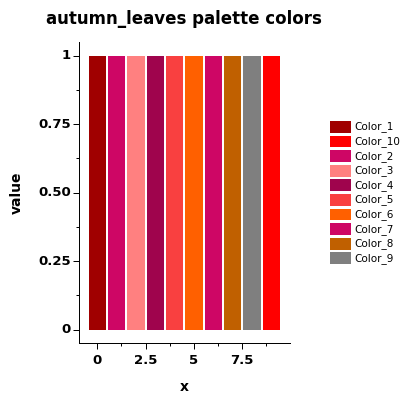

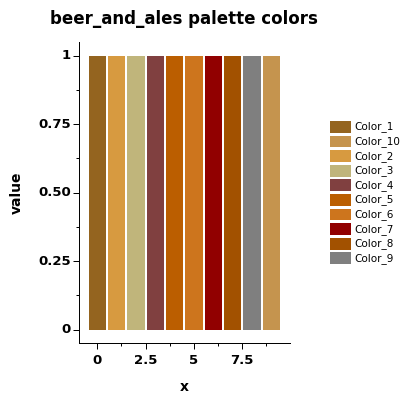

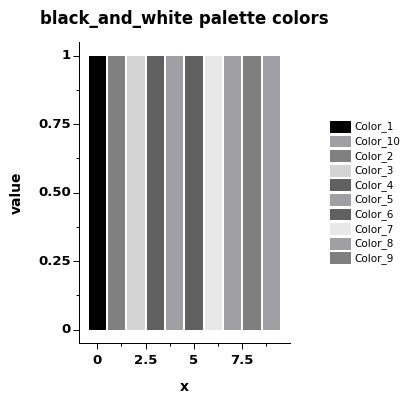

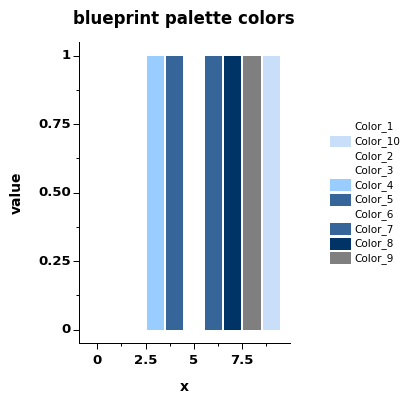

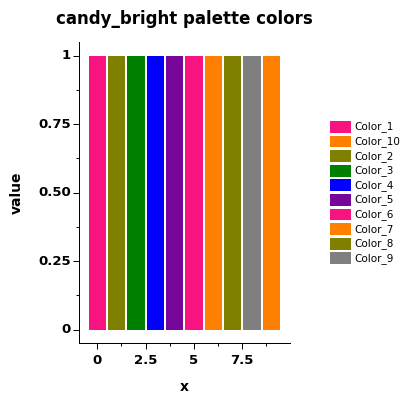

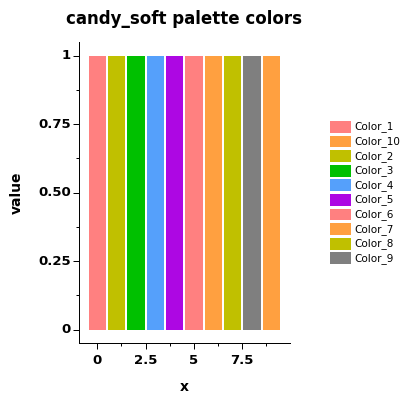

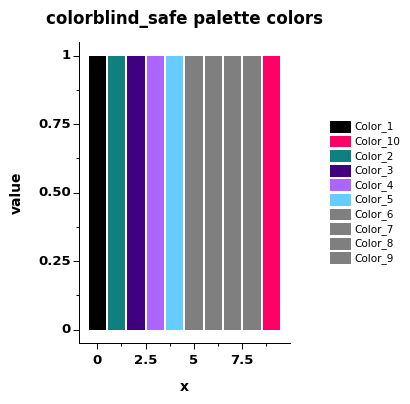

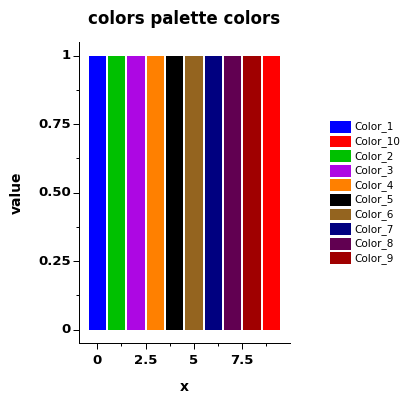

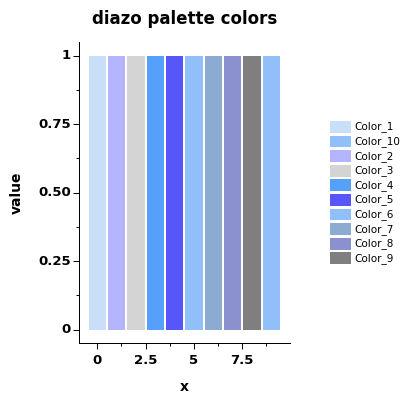

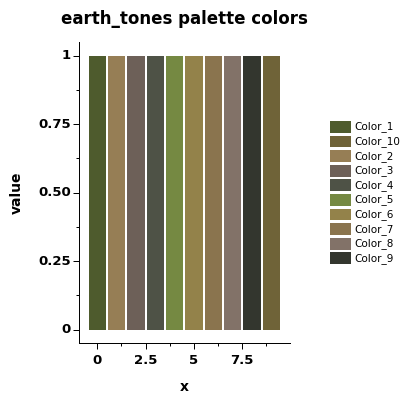

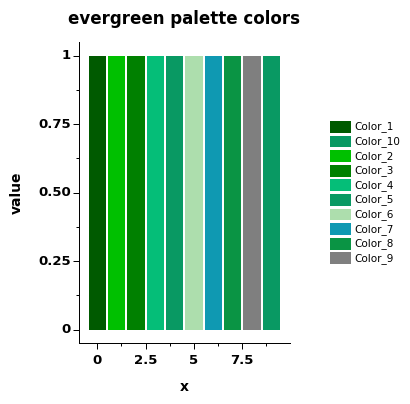

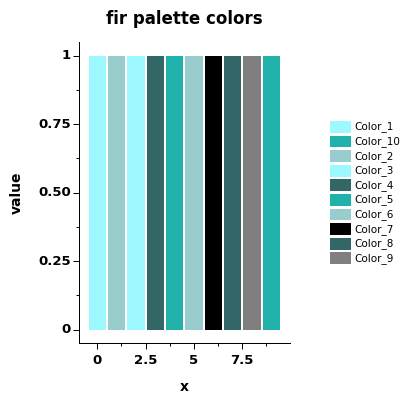

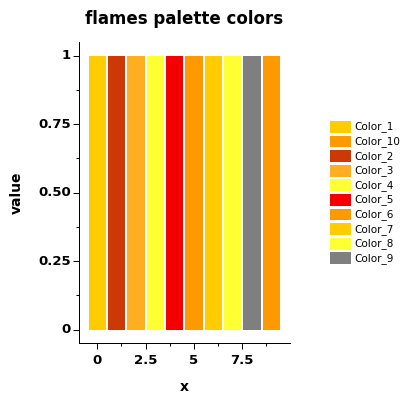

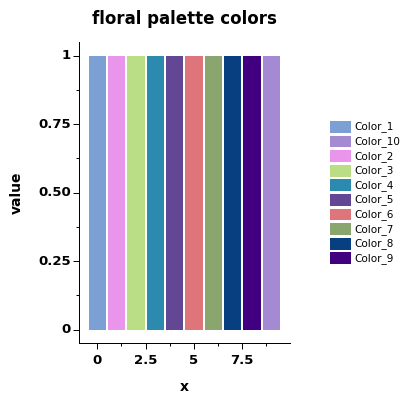

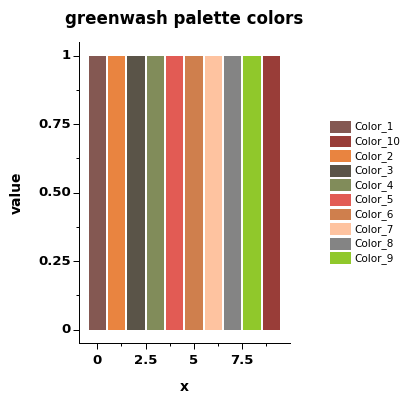

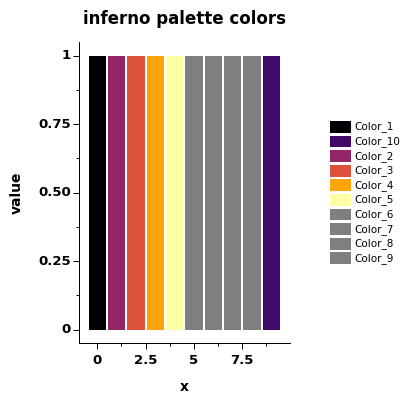

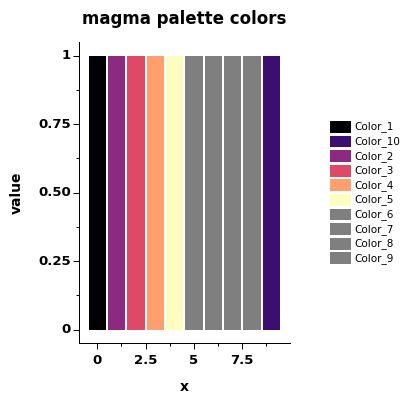

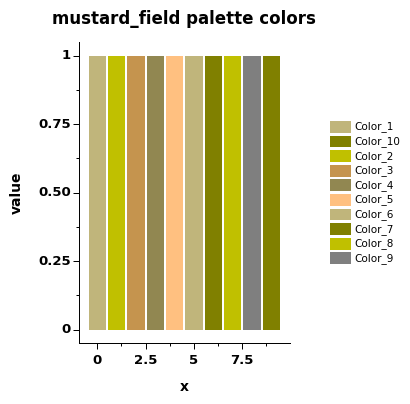

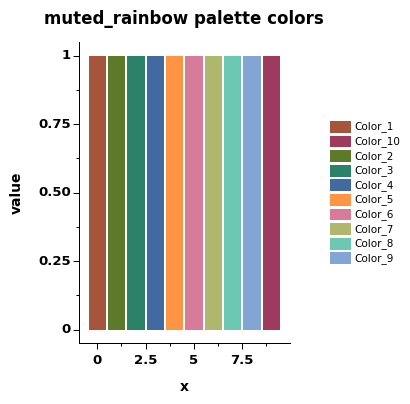

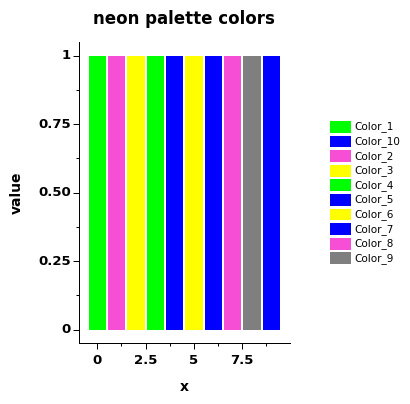

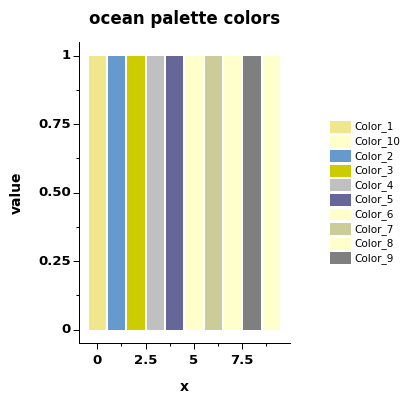

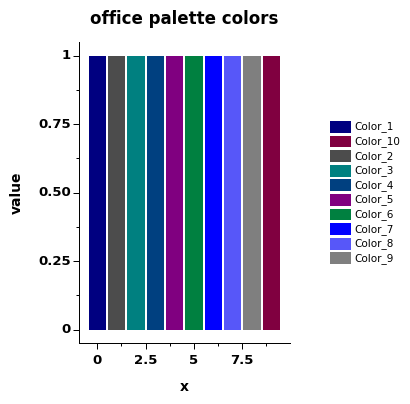

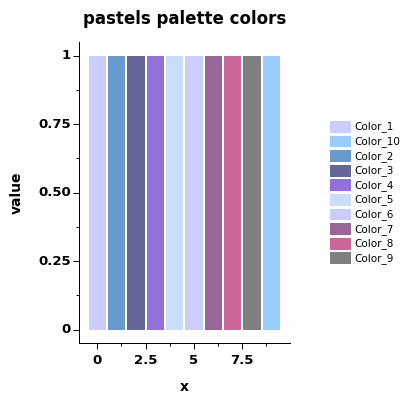

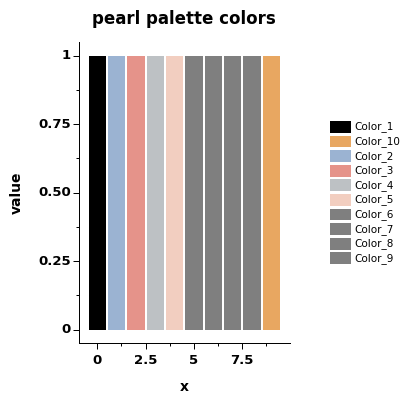

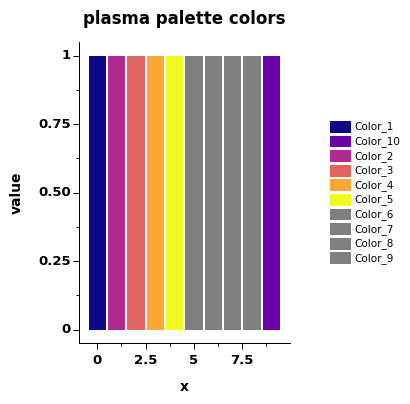

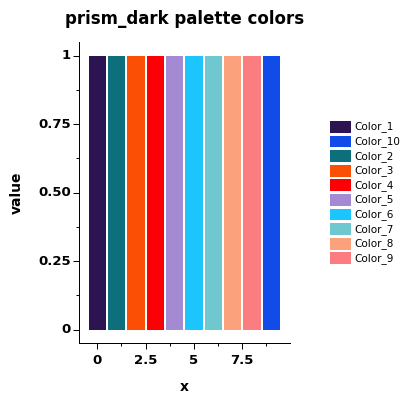

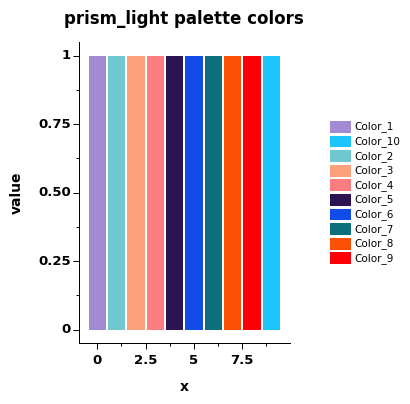

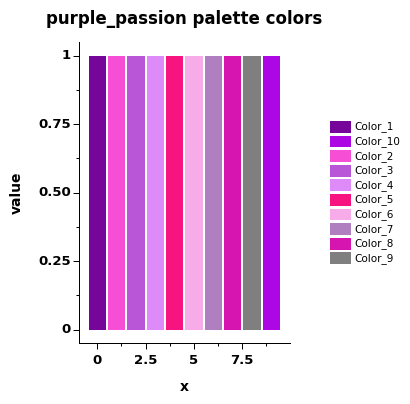

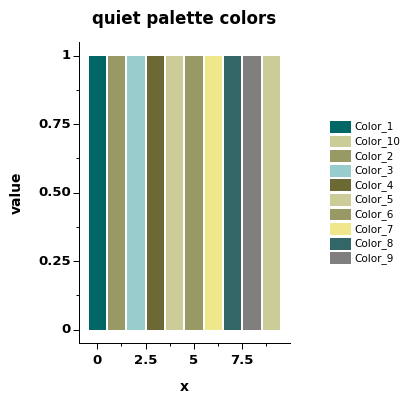

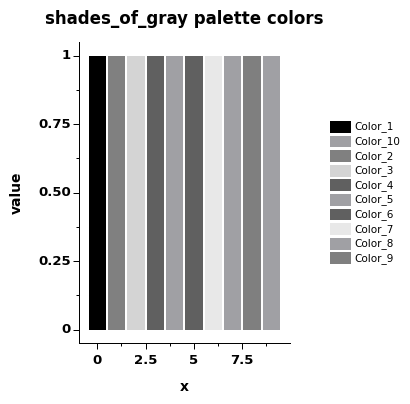

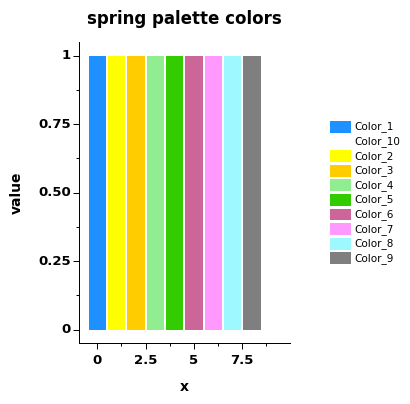

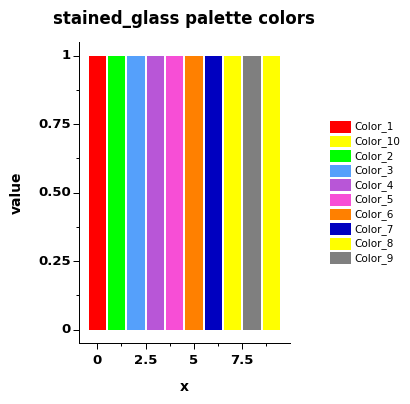

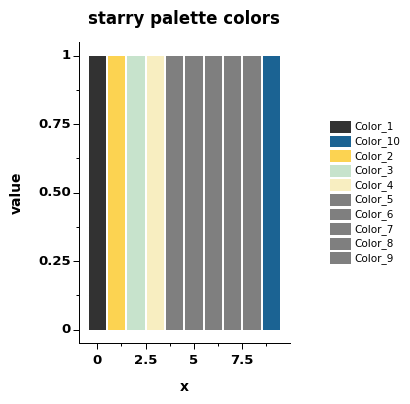

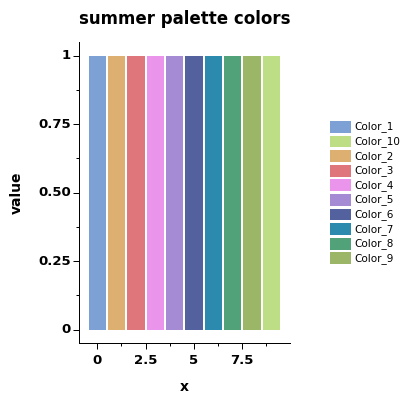

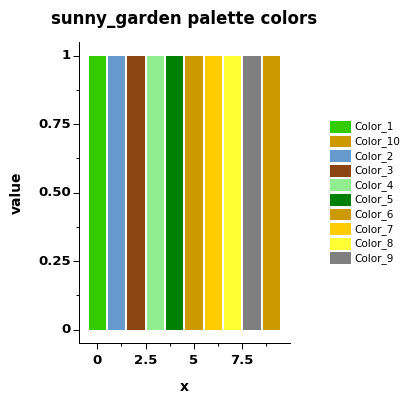

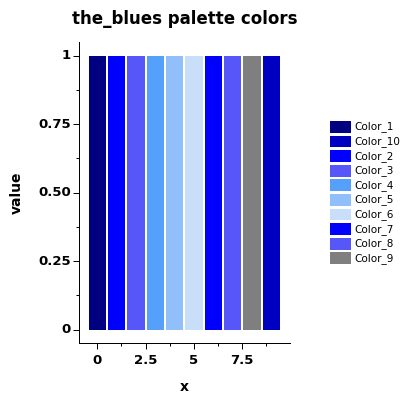

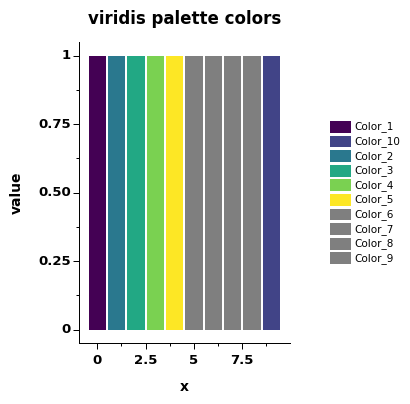

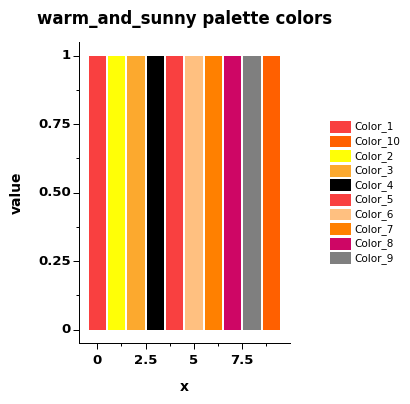

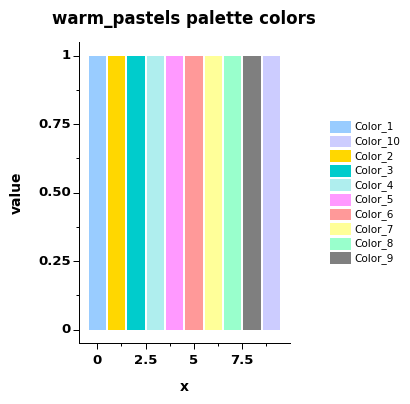

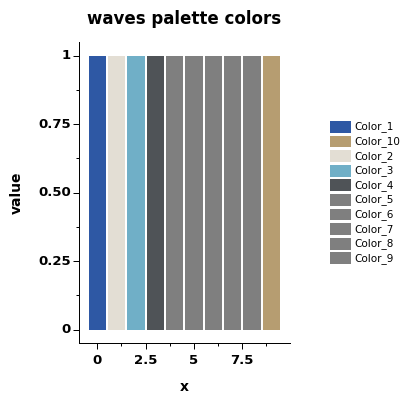

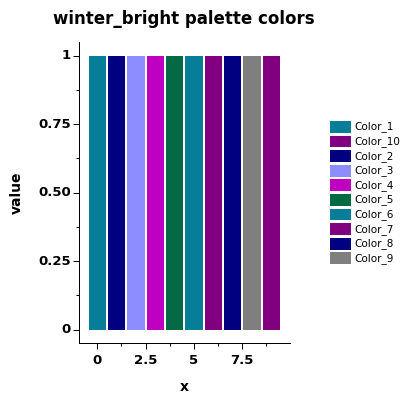

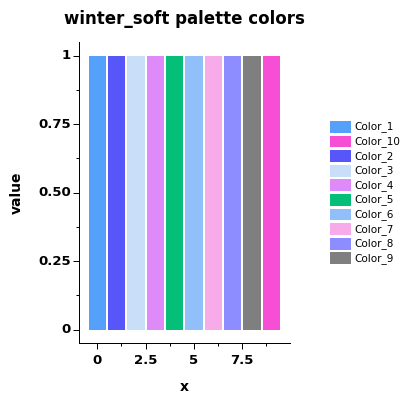

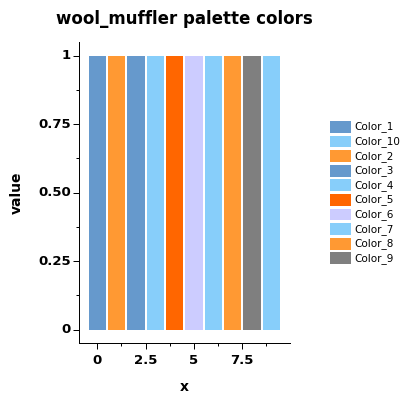

In [10]:
import pandas as pd
from plotnine import *
from plotnine_prism import list_fill_pals, scale_fill_prism, theme_prism

# Create dummy data with enough categories to show all colors
n_colors = 10
dummy_data = pd.DataFrame({
    'category': [f'Color_{i+1}' for i in range(n_colors)],
    'value': [1] * n_colors,
    'x': range(n_colors)
})

# Get all palette names and iterate through them
all_palettes = list_fill_pals()

for palette_name in all_palettes:
    color_swatch = (
        ggplot(dummy_data, aes(x='x', y='value', fill='category')) +
        geom_col() +
        scale_fill_prism(palette_name) +
        theme_prism() +
        labs(title=f'{palette_name} palette colors')
    )
    
    print(color_swatch)

# Shape scales

In [11]:
list_shape_pals()

['complete', 'default', 'filled']

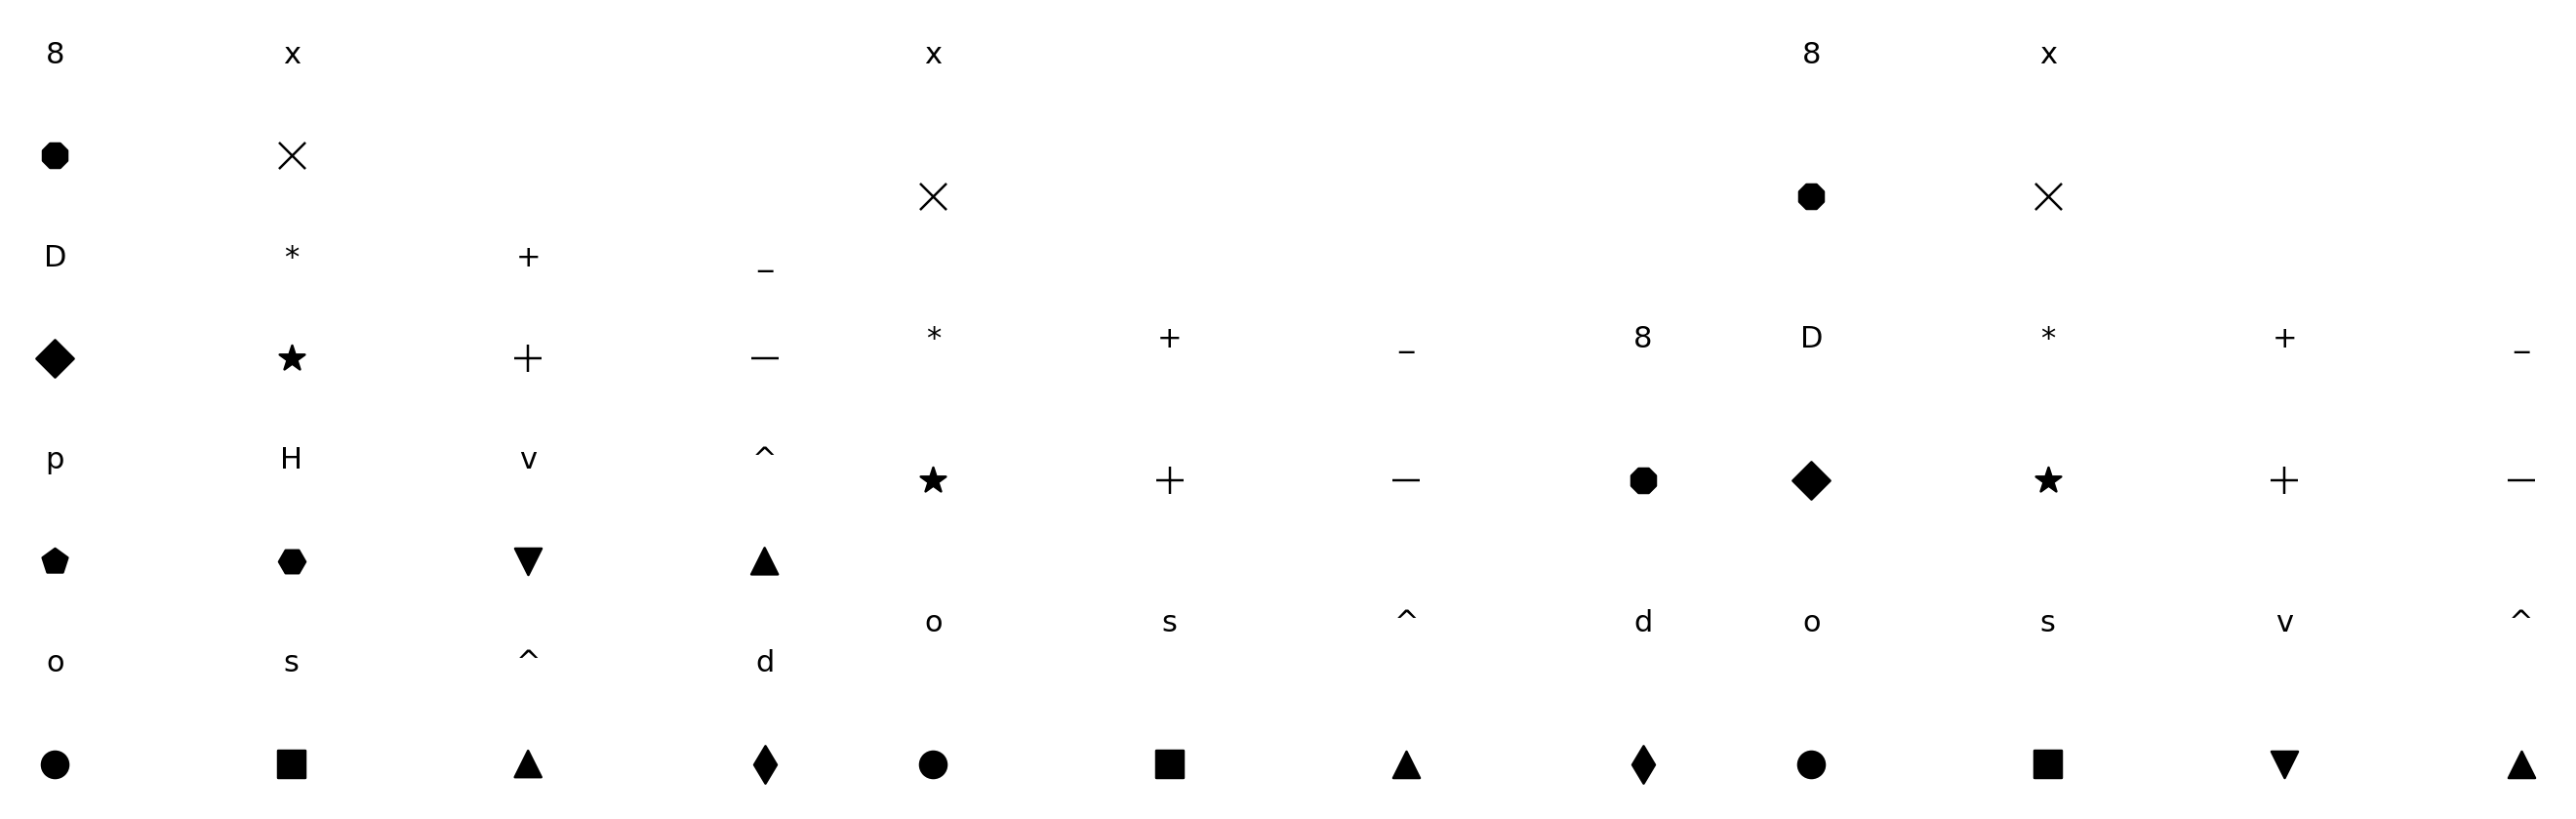

In [12]:
def show_shapes(palette):
    import warnings
    from datar.base import rep, ceiling, seq
    from plotnine_prism.pal import prism_shape_pal
    warnings.simplefilter('ignore')

    pal = prism_shape_pal(palette)(100)
    ncol = 4
    nrow = int(ceiling(len(pal) / 4.0))
    df = tibble(
        x=rep(seq(ncol), nrow)[: len(pal)],
        y_shape=rep([1, 3, 5, 7], each=ncol)[: len(pal)],
        y_label=rep([2, 4, 6, 8], each=ncol)[: len(pal)],
        shape=pal,
    )

    return (
        ggplot(df, aes(x="x"))
        + geom_point(aes(y="y_shape", shape="shape"), size=5)
        + scale_shape_identity() 
        + geom_text(aes(y="y_label", label="shape"))
        + theme_void()
        + theme(
            panel_background=element_rect(fill="gray"), 
            legend_position="none",
        )
    )


p1 = show_shapes("complete")
p2 = show_shapes("default")
p3 = show_shapes("filled")

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b3 = pw.load_ggplot(p3)
b1 | b2 | b3


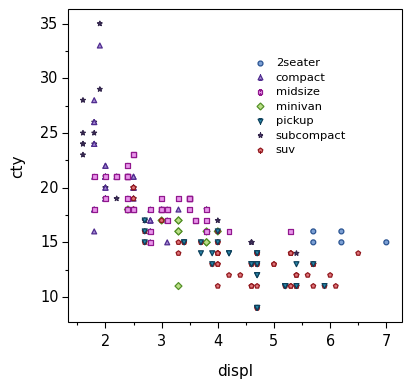

<Figure Size: (400 x 400)>

In [13]:
# create a base plot to compare shape scales
from datar.data import mpg

base = (
    ggplot(mpg, aes(x="displ", y="cty"))
    + geom_point(aes(colour="class", fill="class", shape="class"))
    + theme_prism(base_size=11, base_fontface="plain", border=True)
    + theme(
        legend_position=(0.72, 0.7),
        legend_key_height=8,
    )
    + coord_cartesian()
    + scale_colour_prism(palette="floral")
    + scale_fill_prism(palette="floral")
)

base


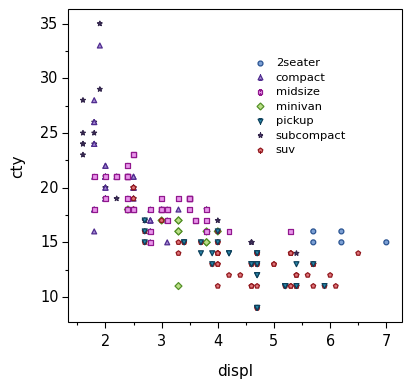

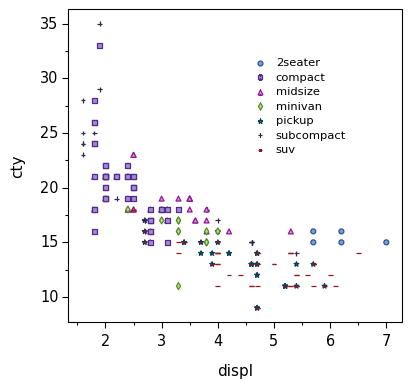

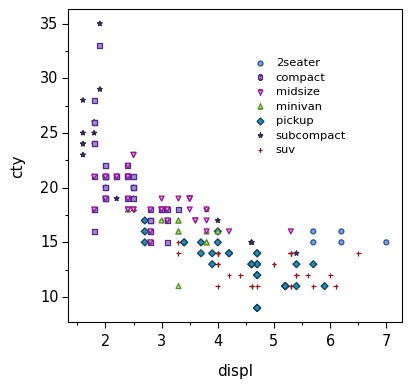

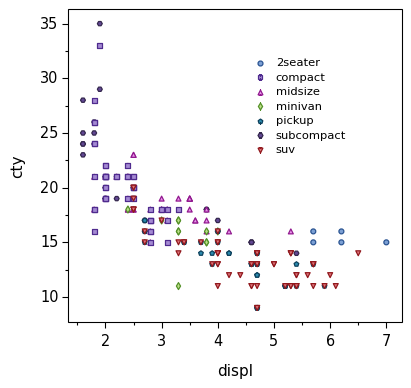

In [14]:
# compare shape scales
p1 = base
p2 = base + scale_shape_prism(palette="default") 
p3 = base + scale_shape_prism(palette="filled") 
p4 = base + scale_shape_prism(palette="complete")

print(p1, p2, p3, p4)